# Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Đọc dữ liệu

In [2]:
df = pd.read_csv('../dataset/book_data.csv')
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer,cover_link
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/5e/18/24/2...
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới,https://salt.tikicdn.com/ts/product/d7/99/24/1...
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn,https://salt.tikicdn.com/ts/product/8d/96/9e/c...
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội,https://salt.tikicdn.com/ts/product/45/3b/fc/a...


# Khám phá và tiền xử lý dữ liệu

## Ý nghĩa của các dòng và các cột

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1796 non-null   int64  
 1   title           1796 non-null   object 
 2   authors         1653 non-null   object 
 3   original_price  1796 non-null   int64  
 4   current_price   1796 non-null   int64  
 5   quantity        1751 non-null   float64
 6   category        1796 non-null   object 
 7   n_review        1796 non-null   int64  
 8   avg_rating      1796 non-null   float64
 9   pages           1546 non-null   object 
 10  manufacturer    1523 non-null   object 
 11  cover_link      1796 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 168.5+ KB


Dữ liệu có 1796 dòng và 12 cột

Mỗi dòng dữ liệu là thông tin về một quyển sách được bán trên sàn thương mại điện tử Tiki Việt Nam.

Ý nghĩa của các cột:
- product_id: mã sản phẩm
- title: tên sách
- authors: tác giả
- original_price: giá gốc
- current_price: giá hiện tại
- quantity: số lượng
- category: phân loại
- n_review: số lượt đánh giá
- avg_rating: điểm đánh giá trung bình
- pages: số trang
- manufacturer: nhà sản xuất
- cover_link: đường dẫn đến ảnh trang bìa

Cột cover_link không mang ý nghĩa phân tích nên ta xóa cột này đi.

In [4]:
df = df.drop(columns=['cover_link'])
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
1,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội


## Các dòng bị trùng lặp

In [5]:
num_duplicated = df.duplicated().sum()
print(f'Số dòng dữ liệu trùng lặp là {num_duplicated}.')

Số dòng dữ liệu trùng lặp là 19.


Ta tiến hành xóa các dòng bị trùng lặp

In [6]:
df = df.drop_duplicates()

In [7]:
num_duplicated = df.duplicated().sum()
print(f'Số dòng dữ liệu trùng lặp là {num_duplicated}.')
print(f'Số dòng dữ liệu còn lại là {df.shape[0]}')

Số dòng dữ liệu trùng lặp là 0.
Số dòng dữ liệu còn lại là 1777


## Kiểu dữ liệu của cột chưa phù hợp

In [8]:
df.dtypes

product_id          int64
title              object
authors            object
original_price      int64
current_price       int64
quantity          float64
category           object
n_review            int64
avg_rating        float64
pages              object
manufacturer       object
dtype: object

In [9]:
# df.title = df.title.astype("category")
# df.authors = df.authors.astype("category")
# df.category = df.category.astype("category")
# df.manufacturer = df.manufacturer.astype("category")

Cột quantity là số lượng quyển sách phải ở kiểu int64, ta sẽ thực hiện ép kiểu sau các thao tác như điền dữ liệu bị thiếu.

Cột pages là số trang nhưng lại có kiểu là object do đó ta tiến hình ép kiểu của pages thành float64 để thuận tiện cho các thao tác sau. Sau khi đã hoàn thành các thao tác xong ta ép về kiểu int64.

In [10]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['pages']

0       244.0
2       184.0
3       430.0
4       228.0
5       304.0
        ...  
1791      NaN
1792    236.0
1793    296.0
1794    436.0
1795    256.0
Name: pages, Length: 1777, dtype: float64

In [11]:
df['pages'] = df['pages'].astype('float64')

## Kiểm tra các cột dữ liệu bị thiếu

In [12]:
df.isnull().sum()

product_id          0
title               0
authors           140
original_price      0
current_price       0
quantity           45
category            0
n_review            0
avg_rating          0
pages             251
manufacturer      265
dtype: int64

Các cột có dữ liệu bị thiếu là: authors, quantity, pages và manufacturer

## Các cột dữ liệu phân loại

In [13]:
categorical_cols = df.select_dtypes(include = 'object').columns.tolist()
print(f'Các cột có kiểu dữ liệu categorical: {categorical_cols}')

Các cột có kiểu dữ liệu categorical: ['title', 'authors', 'category', 'manufacturer']


### Cột title

Ta xóa các quyển sách có tên trùng nhau.

In [14]:
df = df.drop_duplicates(subset=['title'])

### Cột authors

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
print(f'Số lượng các tác giả khác nhau là: {df.authors.nunique()}')
df.authors.value_counts()

Số lượng các tác giả khác nhau là: 1083


Nguyễn Nhật Ánh                            24
Higashino Keigo                            20
.                                          18
Thích Nhất Hạnh                            16
Haruki Murakami                            15
Yoshitoki Oima                             14
Osho                                       14
Nhiều tác giả                              14
Nguyên Phong                               14
Osamu Tezuka                               10
Khương Lệ Bình                              8
David Walliams                              8
Robin Sharma                                8
Brian Tracy                                 7
Đặng Hoàng Giang                            6
Chuya Koyama                                6
Vãn Tình                                    6
Eiichiro Oda                                6
Akira Toriyama                              6
Dale Carnegie                               6
Yasuhisa Hara                               5
Kaito                             

Có 18 quyển sách có tác già là ".", ta tiến hành thay thế các dòng này thành "Không rõ"

In [17]:
df.loc[df.authors == '.' , 'authors'] = "Không rõ"
df.loc[df.authors == '..' , 'authors'] = "Không rõ"
df.loc[df.authors == ' ' , 'authors'] = "Không rõ"

In [18]:
print(f'Số lượng các tác giả khác nhau là: {df.authors.nunique()}')
df.authors.value_counts()

Số lượng các tác giả khác nhau là: 1081


Nguyễn Nhật Ánh                            24
Không rõ                                   20
Higashino Keigo                            20
Thích Nhất Hạnh                            16
Haruki Murakami                            15
Nhiều tác giả                              14
Osho                                       14
Yoshitoki Oima                             14
Nguyên Phong                               14
Osamu Tezuka                               10
Robin Sharma                                8
David Walliams                              8
Khương Lệ Bình                              8
Brian Tracy                                 7
Dale Carnegie                               6
Đặng Hoàng Giang                            6
Eiichiro Oda                                6
Akira Toriyama                              6
Chuya Koyama                                6
Vãn Tình                                    6
Gosho Aoyama                                5
nhieu tac gia                     

In [19]:
# Tính phần trăm giá trị thiếu trong cột 'authors'
missing_percentage = df['authors'].isna().mean() * 100

# In kết quả
print(f"Phần trăm giá trị thiếu trong cột 'authors': {missing_percentage:.2f}%")

Phần trăm giá trị thiếu trong cột 'authors': 7.80%


In [20]:
df.authors = df.authors.fillna("Không rõ")

In [21]:
# Tính phần trăm giá trị thiếu trong cột 'authors'
missing_percentage = df['authors'].isna().mean() * 100
# In kết quả
print(f"Phần trăm giá trị thiếu trong cột 'authors': {missing_percentage:.2f}%")

Phần trăm giá trị thiếu trong cột 'authors': 0.00%


### Cột category

In [22]:
print(f'Số lượng các thể loại khác nhau là: {df.category.nunique()}')
category_counts = df.category.value_counts()
category_counts 

Số lượng các thể loại khác nhau là: 354


Sách tư duy - Kỹ năng sống                                                                                                                        292
Tiểu Thuyết                                                                                                                                       133
Truyện ngắn - Tản văn - Tạp Văn                                                                                                                   109
Sách nghệ thuật sống đẹp                                                                                                                           58
Sách kỹ năng làm việc                                                                                                                              55
Bài học kinh doanh                                                                                                                                 53
Truyện trinh thám                                                                                   

Có quá nhiều thể loại, đăc biệt có những thể loại chỉ có 1 quyển sách và ta thấy rằng nó giống tên của quyển sách hơn là thể loại. Do đó ta chuyển các category của những quyển sách có tên sách giống với category thành Khác.

In [23]:
df['category'] = df.apply(lambda row: 'Khác' if row['category'] == row['title'] else row['category'], axis=1)

# In kết quả
print(f'Số lượng các thể loại khác nhau là: {df.category.nunique()}')
print(df['category'].value_counts())

Số lượng các thể loại khác nhau là: 76
Sách tư duy - Kỹ năng sống                 292
Khác                                       279
Tiểu Thuyết                                133
Truyện ngắn - Tản văn - Tạp Văn            109
Sách nghệ thuật sống đẹp                    58
Sách kỹ năng làm việc                       55
Bài học kinh doanh                          53
Truyện trinh thám                           52
Sách Học Tiếng Anh                          42
Sách Marketing - Bán hàng                   40
Sách tài chính, tiền tệ                     40
Tác phẩm kinh điển                          38
Truyện Giả tưởng - Huyền Bí - Phiêu Lưu     37
Kiến thức - Bách khoa                       33
Sách Làm Cha Mẹ                             32
Lĩnh vực khác                               31
Truyện dài                                  23
Kiến Thức Bách Khoa                         23
Văn học thiếu nhi                           21
Light novel                                 19
Truyện kể cho bé     

Ta phát hiện có một category kỳ lạ: Sữa tiệt trùng (UHT). Ta kiểm tra nó.

In [24]:
df[df['category'] == 'Sữa tiệt trùng (UHT)']

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
374,161409461,Thùng 48 hộp sữa tươi tiệt trùng có đường TH T...,Không rõ,406800,386000,1372.0,Sữa tiệt trùng (UHT),117,5.0,NaN,NaN


Ta thấy sản phẩm này không phải là sách nên ta xóa nó đi.

In [25]:
df.drop(index=374, inplace=True)

Ta kiểm tra tiếp các category có 1 quyển sách

In [26]:
# Lọc các category có đúng 1 quyển sách
single_book_categories = category_counts[category_counts == 1].index
books_with_single_category = df[df['category'].isin(single_book_categories)]
books_with_single_category

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
994,171057415,Cẩm nang hướng dẫn tự học tiếng Thái – trình đ...,Tuấn Kiệt,120000,120000,462.0,Ngoại Ngữ Khác,91,5.0,292.0,Nhà Xuất Bản Thanh Niên
1021,193590152,Méthode Rose - Phương pháp hồng 1 - Năm thứ nh...,Ernest Van De Velde,150000,91001,171.0,Âm Nhạc - Điện Ảnh,22,5.0,124.0,Nhà Xuất Bản Dân Trí
1272,107576379,"Sổ tay học sinh Destination B1,B2,C1&2",Không rõ,70000,66500,646.0,Sách tham khảo cấp I,106,4.8,NaN,NaN
1513,68350215,Combo Chinh Phục Luyện Thi Vào 10 Toán Văn Anh...,Nhiều tác giả,477000,306000,1090.0,Sách tham khảo cấp II,344,5.0,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội
1646,189765038,Python lập trình thuật toán,Bùi Việt Hà,95000,95000,271.0,Lập Trình,37,5.0,178.0,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội


Có 2 category có pages là NaN. Ta lưu 2 category này lại để xử lý cho phần pages ở sau vì ý tưởng của nhóm là điền giá trị bị thiếu ở cột pages theo trung bình của phân loại sách.

In [27]:
nan_page_category = ['Sách tham khảo cấp I', 'Sách tham khảo cấp II']

### Cột manufacturer

In [28]:
print(f'Số lượng các nhà xuất bản khác nhau là: {df.manufacturer.nunique()}')
df.manufacturer.value_counts()

Số lượng các nhà xuất bản khác nhau là: 41


Nhà Xuất Bản Thế Giới                            247
NXB Trẻ                                          143
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Dân Trí                             126
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           97
Nhà Xuất Bản Tổng hợp TP.HCM                      91
Nhà Xuất Bản Lao Động                             89
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             56
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              13
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                              7
Nhà Xuất Bản Lao Động Xã Hội                  

Có những giá trị có cách thể hiện khác nhau:
- Nhà Xuất Bản Hồng Đức & hong duc
- Nhà Xuất Bản Dân Trí & NXB Dân Trí
- Nhà Xuất Bản Đại Học Quốc Gia Hà Nội & ĐHQG Hà Nội

In [29]:
def handle_manufactuner(manufactuner):
    if manufactuner == "hong duc":
        return "Nhà Xuất Bản Hồng Đức"
    elif manufactuner == "NXB Dân Trí":
        return "Nhà Xuất Bản Dân Trí"
    elif manufactuner == "ĐHQG Hà Nội":
        return "Nhà Xuất Bản Đại Học Quốc Gia Hà Nội"
    else:
        return manufactuner
    
df.manufacturer = df.manufacturer.apply(lambda manufacturer: handle_manufactuner(manufacturer))

In [30]:
# Tính phần trăm giá trị thiếu
missing_manufacturer = df['manufacturer'].isna().mean() * 100
print(f"Phần trăm giá trị thiếu trong cột 'manufacturer': {missing_manufacturer:.2f}%")

Phần trăm giá trị thiếu trong cột 'manufacturer': 14.93%


Xử lý các giá trị null bằng cách điền vào Unknown

In [31]:
df.manufacturer = df.manufacturer.fillna("Không rõ")

In [32]:
# Tính phần trăm giá trị thiếu
missing_manufacturer = df['manufacturer'].isna().mean() * 100
print(f"Phần trăm giá trị thiếu trong cột 'manufacturer': {missing_manufacturer:.2f}%")

Phần trăm giá trị thiếu trong cột 'manufacturer': 0.00%


In [33]:
print(f'Số lượng các nhà xuất bản khác nhau là: {df.manufacturer.nunique()}')
df.manufacturer.value_counts()

Số lượng các nhà xuất bản khác nhau là: 39


Không rõ                                         264
Nhà Xuất Bản Thế Giới                            247
NXB Trẻ                                          143
Nhà Xuất Bản Dân Trí                             132
Nhà Xuất Bản Hà Nội                              128
Nhà Xuất Bản Kim Đồng                            113
Nhà Xuất Bản Hội Nhà Văn                         111
Nhà Xuất Bản Thanh Niên                           97
Nhà Xuất Bản Tổng hợp TP.HCM                      91
Nhà Xuất Bản Lao Động                             89
Nhà Xuất Bản Văn Học                              77
Nhà Xuất Bản Hồng Đức                             59
Nhà Xuất Bản Công Thương                          46
Nhà Xuất Bản Phụ Nữ Việt Nam                      38
Nhà Xuất Bản Phụ Nữ                               30
Nhà Xuất Bản Đà Nẵng                              17
Nhà Xuất Bản Đại Học Quốc Gia Hà Nội              14
Nhà Xuất Bản Mỹ Thuật                              8
Nhà Xuất Bản Tri Thức                         

In [34]:
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244.0,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184.0,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430.0,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228.0,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304.0,Nhà Xuất Bản Hội Nhà Văn


## Các cột dữ liệu số

In [35]:
# Lấy danh sách tên cột dữ liệu dạng numeric
numeric_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(f'Các cột có kiểu dữ liệu số: {numeric_cols}')

Các cột có kiểu dữ liệu số: ['product_id', 'original_price', 'current_price', 'quantity', 'n_review', 'avg_rating', 'pages']


### Xử lý giá trị thiếu

In [36]:
missing_dict = {}
for col in numeric_cols:
  missing = df[col].isna().mean() *100
  missing_dict[col] = missing
  print(f'Phần trăm giá trị còn thiếu của {col} là {missing}%')

Phần trăm giá trị còn thiếu của product_id là 0.0%
Phần trăm giá trị còn thiếu của original_price là 0.0%
Phần trăm giá trị còn thiếu của current_price là 0.0%
Phần trăm giá trị còn thiếu của quantity là 2.319004524886878%
Phần trăm giá trị còn thiếu của n_review là 0.0%
Phần trăm giá trị còn thiếu của avg_rating là 0.0%
Phần trăm giá trị còn thiếu của pages là 13.914027149321267%


Xử lý missing value bằng cách điền vào trung bình theo các nhóm phân loại.

Trước tiên ta xử lý các category có 1 quyển sách và có pages là nan (nan_page_category)

In [37]:
mean_pages = df['pages'].mean(skipna=True)

df.loc[df['category'].isin(nan_page_category), 'pages'] = df.loc[df['category'].isin(nan_page_category), 'pages'].fillna(mean_pages)

# Kiểm tra kết quả
print(f"Giá trị trung bình của pages: {mean_pages}")
df[df['category'].isin(nan_page_category)]

Giá trị trung bình của pages: 455.5394218134034


,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
1272,107576379,"Sổ tay học sinh Destination B1,B2,C1&2",Không rõ,70000,66500,646.0,Sách tham khảo cấp I,106,4.8,455.539422,Không rõ
1513,68350215,Combo Chinh Phục Luyện Thi Vào 10 Toán Văn Anh...,Nhiều tác giả,477000,306000,1090.0,Sách tham khảo cấp II,344,5.0,455.539422,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội


In [38]:
# Tính trung bình của 'pages' theo từng 'category'
df['pages'] = df.groupby('category')['pages'].transform(lambda x: x.fillna(x.mean()))
df['pages'] = df['pages'].round().astype('int64')
df

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075.0,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929.0,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896.0,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668.0,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000.0,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn
6,3304875,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,105000,63000,25272.0,Truyện ngắn - Tản văn - Tạp Văn,3791,4.8,358,Không rõ
7,167940010,Thao Túng Tâm Lý,Shannon Thomas,169000,103000,8152.0,Sách tư duy - Kỹ năng sống,785,4.8,328,Nhà Xuất Bản Dân Trí
8,117238177,Thư Viện Nửa Đêm,Matt Haig,150000,90000,7166.0,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,1544,4.8,424,Nhà Xuất Bản Hội Nhà Văn
11,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,Lê Bảo Ngọc,128000,96000,4630.0,Sách tư duy - Kỹ năng sống,604,4.8,296,Nhà Xuất Bản Thế Giới
12,199216988,Càng Bình Tĩnh Càng Hạnh Phúc,Vãn Tình,139000,85180,3980.0,Sách tư duy - Kỹ năng sống,327,4.8,352,Nhà Xuất Bản Thế Giới


In [39]:
df['quantity'] = df.groupby('category')['quantity'].transform(lambda x: x.fillna(x.mean()))
df['quantity'] = df['quantity'].round().astype('int64')
df

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.0,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Sách tư duy - Kỹ năng sống,780,4.8,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.8,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.0,228,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000,Tiểu Thuyết,1636,4.8,304,Nhà Xuất Bản Hội Nhà Văn
6,3304875,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,105000,63000,25272,Truyện ngắn - Tản văn - Tạp Văn,3791,4.8,358,Không rõ
7,167940010,Thao Túng Tâm Lý,Shannon Thomas,169000,103000,8152,Sách tư duy - Kỹ năng sống,785,4.8,328,Nhà Xuất Bản Dân Trí
8,117238177,Thư Viện Nửa Đêm,Matt Haig,150000,90000,7166,Truyện Giả tưởng - Huyền Bí - Phiêu Lưu,1544,4.8,424,Nhà Xuất Bản Hội Nhà Văn
11,189643105,Không Phải Sói Nhưng Cũng Đừng Là Cừu -Tặng kè...,Lê Bảo Ngọc,128000,96000,4630,Sách tư duy - Kỹ năng sống,604,4.8,296,Nhà Xuất Bản Thế Giới
12,199216988,Càng Bình Tĩnh Càng Hạnh Phúc,Vãn Tình,139000,85180,3980,Sách tư duy - Kỹ năng sống,327,4.8,352,Nhà Xuất Bản Thế Giới


### Kiểm tra các khoảng giá trị

In [40]:
numeric_cols.remove('product_id')

In [41]:
statistics = df[numeric_cols].describe()

# Hiển thị các chỉ số thống kê với 2 chữ số thập phân
pd.set_option('display.float_format', '{:,.2f}'.format)
statistics

,original_price,current_price,quantity,n_review,avg_rating,pages
count,"1,768.00","1,768.00","1,768.00","1,768.00","1,768.00","1,768.00"
mean,"158,349.88","114,974.25","2,803.95",328.60,4.60,437.60
std,"127,086.62","101,673.61","16,794.46",730.80,1.13,"4,562.47"
min,0.00,0.00,1.00,0.00,0.00,10.00
25%,"89,000.00","60,000.00",179.50,16.00,4.80,216.00
50%,"129,000.00","88,685.00",597.00,75.00,4.80,299.50
75%,"189,000.00","136,500.00","2,248.00",303.75,5.00,403.25
max,"1,550,000.00","1,200,000.00","671,121.00","11,481.00",5.00,"192,000.00"


Giá trị 0 ở cột n_review và avg_rating là dễ hiểu bởi có những quyển sách có lượt mua thấp chưa được đánh giá. Ta sẽ tiến hành phân tích sau.
Ta thấy cột original_price và current_price có giá trị 0 khá bất thường. Ta tiến hành kiểm tra.

In [42]:
zero_price = df[(df['original_price'] == 0) | (df['current_price'] == 0)]
zero_price

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
968,203875661,( Khóa Học ) IELTS Fighter Target 6.5 Speaking,Không rõ,0,0,56,Sách Học Tiếng Anh,0,0.00,423,Nhà Xuất Bản Thế Giới


Có một dòng có dữ liệu bất thường. Xóa dòng dữ liệu trên

In [43]:
df.drop(index=968, inplace=True)

In [44]:
zero_price = df[(df['original_price'] == 0) | (df['current_price'] == 0)]
zero_price

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer


In [45]:
statistics = df[numeric_cols].describe()
statistics

,original_price,current_price,quantity,n_review,avg_rating,pages
count,"1,767.00","1,767.00","1,767.00","1,767.00","1,767.00","1,767.00"
mean,"158,439.50","115,039.31","2,805.51",328.79,4.60,437.61
std,"127,066.70","101,665.56","16,799.09",730.97,1.12,"4,563.76"
min,"15,000.00","9,600.00",1.00,0.00,0.00,10.00
25%,"89,000.00","60,000.00",180.00,16.00,4.80,216.00
50%,"129,000.00","88,800.00",598.00,75.00,4.80,299.00
75%,"189,000.00","136,500.00","2,249.00",304.50,5.00,403.00
max,"1,550,000.00","1,200,000.00","671,121.00","11,481.00",5.00,"192,000.00"


Khoảng giá trị của các cột đã khá hợp lý:
- original_price: 15,000 - 1,550,000
- current_price: 9,600 - 1,200,000
- quantity: 1 - 671,121
- n_review: 0 - 11,481
- avg_rating: 0.00 - 5.00
- pages: 10.00 - 192,000

### Kiểm tra các phân phối

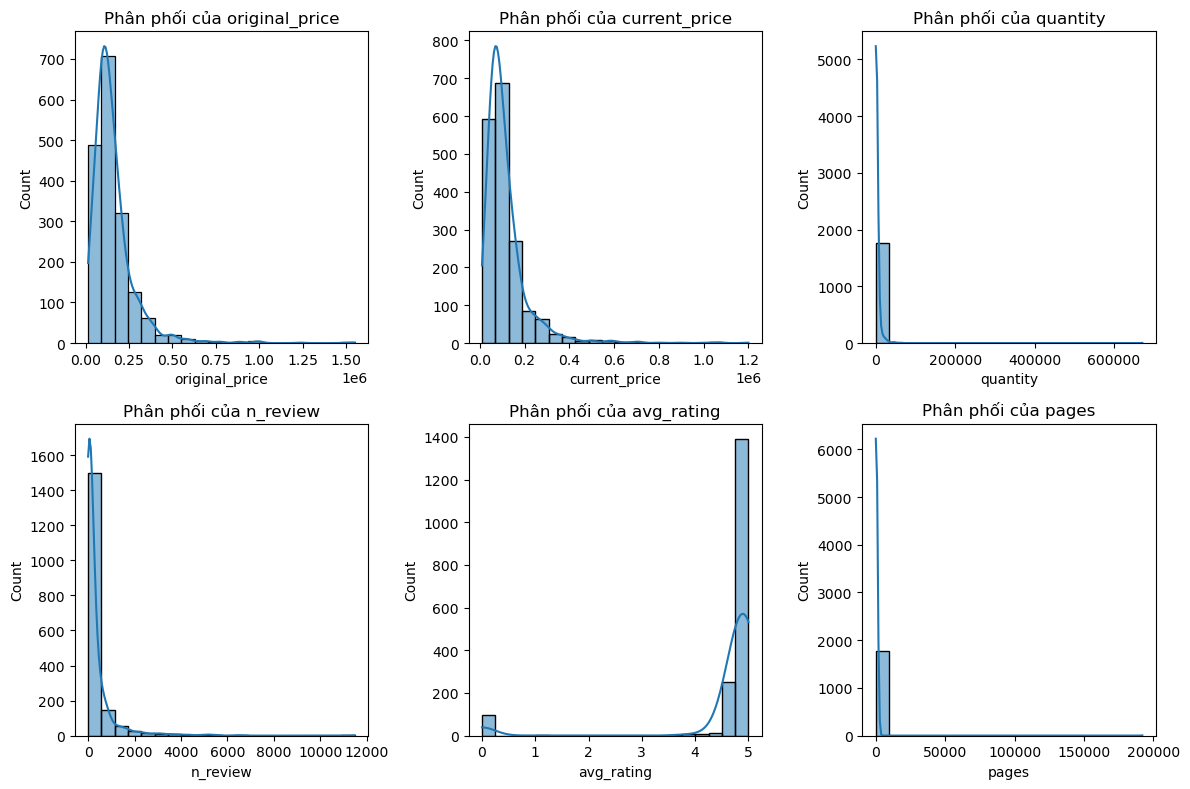

In [46]:
plt.figure(figsize=(12, 8))

# Duyệt qua các cột số và vẽ phân phối
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2, i+1)
    sns.histplot(df[col], kde=True, bins=20) 
    plt.title(f'Phân phối của {col}')
    plt.tight_layout()

plt.show()

Phân phỗi của các cột không có bất thường. Ta sẽ tiến hành phân tích ở phần sau để rõ hơn.

# Lưu dữ liệu

In [47]:
df.head()

,product_id,title,authors,original_price,current_price,quantity,category,n_review,avg_rating,pages,manufacturer
0,74021317,Cây Cam Ngọt Của Tôi,José Mauro de Vasconcelos,108000,64800,53075,Tiểu Thuyết,11481,5.00,244,Nhà Xuất Bản Hội Nhà Văn
2,184466860,Hành Tinh Của Một Kẻ Nghĩ Nhiều,Nguyễn Đoàn Minh Thư,86000,59900,7929,Sách tư duy - Kỹ năng sống,780,4.80,184,Nhà Xuất Bản Thế Giới
3,73787185,Những Tù Nhân Của Địa Lý,Tim Marshall,210000,126000,17896,Lĩnh vực khác,3623,4.80,430,Nhà Xuất Bản Hội Nhà Văn
4,52789367,Nhà Giả Kim (Tái Bản 2020),Paulo Coelho,79000,47400,24668,Tác phẩm kinh điển,5131,5.00,228,Nhà Xuất Bản Hà Nội
5,147920903,Một Thoáng Ta Rực Rỡ Ở Nhân Gian,Không rõ,135000,81000,10000,Tiểu Thuyết,1636,4.80,304,Nhà Xuất Bản Hội Nhà Văn


In [48]:
df.to_csv('../dataset/book_data_cleaned.csv', index=False)

# Tương quan giữa các thuộc tính

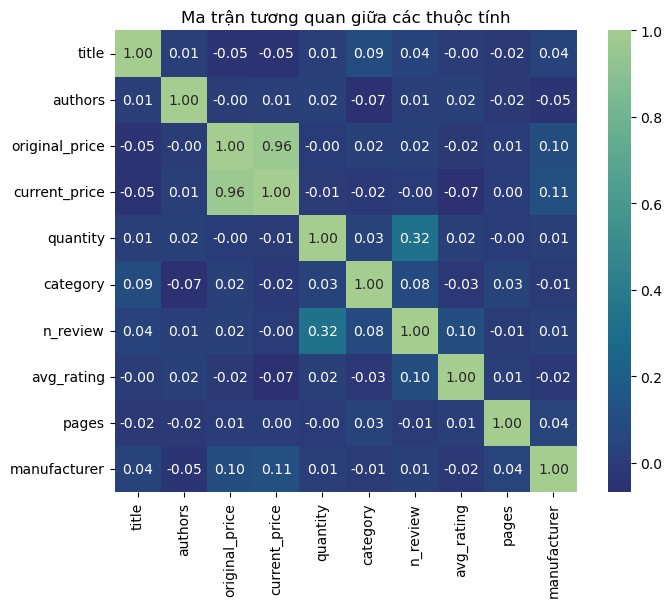

In [49]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df_without_id = df.drop(columns=['product_id'])

correlation_matrix = df_without_id.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest_r', square=True)
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.show()

Tương quan cao:
- original_price và current_price có tương quan rất cao (≈ 0.96). Nguyên nhân là bởi vì current_price đuicự tính dựa trên giá gốc với tỷ lệ giảm giá. 
- quantity và n_review có tương quan khá cao (0.32) cho thấy rằng rằng các sản phẩm có số lượng lớn thường nhận được nhiều đánh giá hơn.

Tương quan thấp:
- avg_rating gần như không có mối liên hệ tuyến tính (≈ 0) với các thuộc tính còn lại. Ta cần phân tích rõ hơn ở các phần sau.
- pages có tương quan gần 0 với các thuộc tính còn lại, nghĩa là số trang của sản phẩm (có thể là sách) không có ảnh hưởng nhiều đến các thuộc tính khác.